<a href="https://colab.research.google.com/github/Zaernsn/DeepLearning/blob/main/MNIST_READA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U fastai 

  Using cached https://files.pythonhosted.org/packages/79/50/0b81742909d433ef5b67b4417597b41cd37b38a073714bc83dc150c81b2f/fastai-2.2.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/94/df/969e69a94cff1c8911acb0688117f95e1915becc1e01c73e7960a2c76ec8/torchvision-0.8.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/90/5d/095ddddc91c8a769a68c791c019c5793f9c4456a688ddd235d6670924ecb/torch-1.7.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/0c/98/60404e2817cff113a6ae4023bc1772e23179408fdf7857fa410551758dfe/fastcore-1.3.19-py3-none-any.whl
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully u

In [3]:
import fastai
print(fastai.__version__)

2.2.7


In [23]:
import os 
from fastai.vision.all import *

In [8]:
!pip install azure-cognitiveservices-search-imagesearch

     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 40kB 4.0MB/s 
     |████████████████████████████████| 92kB 6.1MB/s 
     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 3.2MB 11.1MB/s 


In [20]:
key = os.environ.get('AZURE_SEARCH_KEY','7325a96b00a044d4a1ae09c6fe1b6754')

In [22]:
from azure.cognitiveservices.search.imagesearch import ImageSearchClient as api
from msrest.authentication import CognitiveServicesCredentials as auth

In [40]:
from itertools import chain

In [49]:
def search_images_bing(key, term, min_sz=224):
  headers = {"Ocp-Apim-Subscription-Key":key}
  search_url = "https://api.bing.microsoft.com/v7.0/images/search"
  max_count = 150
  total_count= 160
  imgs = []
  for offset in range(0, total_count, max_count):
      if ((total_count - offset) > max_count):
          count = max_count
      else:
          count = total_count - offset

      params = {'q':term, 'count':count, 'min_height':min_sz, 'min_width':min_sz, 'offset': offset}
      response = requests.get(search_url, headers=headers, params=params)
      search_results = response.json()
      imgs.append(L(search_results['value']))

  return L(chain(*imgs)).attrgot('contentUrl').unique()

In [53]:
results = search_images_bing(key,'saab9-3')
len(results)

152

In [54]:
results[:1]

(#1) ['https://s1.cdn.autoevolution.com/images/gallery/SAAB-9-3-Aero-Convertible-1859_24.jpg']

In [61]:
dest = '/content/images/saab9-33.jpg'
download_url(results[3],dest)

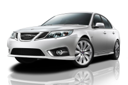

In [62]:
im = Image.open(dest)
im.to_thumb(128,128)

In [65]:
model_types = '9-3','9-5','93','900','9000'
path = Path('/content/images/saab')

In [66]:
if not path.exists():
  path.mkdir()
  for o in model_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results =search_images_bing(key,f'saab {0}')
    download_images(dest,urls=results)

In [73]:
fns = get_image_files(path)
fns

(#760) [Path('/content/images/saab/93/00000020.jpg'),Path('/content/images/saab/93/00000071.jpg'),Path('/content/images/saab/93/00000008.jpg'),Path('/content/images/saab/93/00000138.jpg'),Path('/content/images/saab/93/00000021.jpg'),Path('/content/images/saab/93/00000135.jpg'),Path('/content/images/saab/93/00000107.jpg'),Path('/content/images/saab/93/00000062.jpg'),Path('/content/images/saab/93/00000126.png'),Path('/content/images/saab/93/00000129.jpg')...]

In [74]:
failed = verify_images(fns)
failed

(#0) []

In [75]:
failed.map(Path.unlink)

(#0) []

In [76]:
!ls /content/images/saab

900  9000  93  9-3  9-5


In [77]:
!tar -czvf saab_images.tar.gz /content/images/saab

tar: Removing leading `/' from member names
/content/images/saab/
/content/images/saab/93/
/content/images/saab/93/00000020.jpg
/content/images/saab/93/00000071.jpg
/content/images/saab/93/00000008.jpg
/content/images/saab/93/00000138.jpg
/content/images/saab/93/00000021.jpg
/content/images/saab/93/00000135.jpg
/content/images/saab/93/00000107.jpg
/content/images/saab/93/00000062.jpg
/content/images/saab/93/00000048.jpg?itok=KW8ctf60
/content/images/saab/93/00000126.png
/content/images/saab/93/00000129.jpg
/content/images/saab/93/00000024.jpg
/content/images/saab/93/00000100.jpg
/content/images/saab/93/00000156.jpg
/content/images/saab/93/00000158.jpg
/content/images/saab/93/00000030.jpg
/content/images/saab/93/00000136.jpg
/content/images/saab/93/00000060.jpg
/content/images/saab/93/00000143.jpg
/content/images/saab/93/00000140.jpg
/content/images/saab/93/00000028.jpg
/content/images/saab/93/00000010.JPG
/content/images/saab/93/00000103.jpg
/content/images/saab/93/00000105.jpg
/conten